<a href="https://colab.research.google.com/github/dbwilburn/BIOC5721/blob/main/Hookes_Law_Riemann_Sums_AU24_DBW240905.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

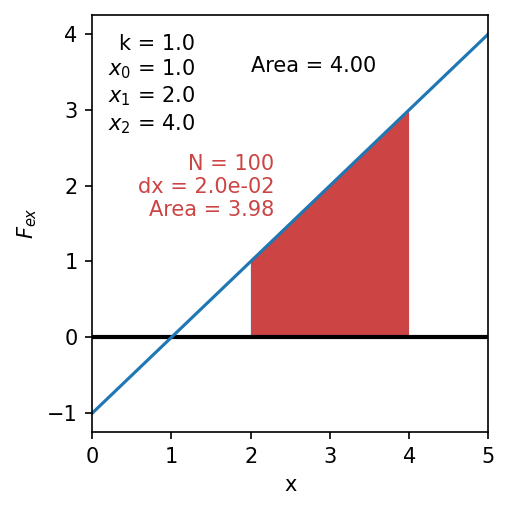

In [1]:
## Libraries

import numpy as np
import matplotlib.pyplot as plt

## Code to generate Riemann sum plots

# Define parameters
x_min = 0
x_max = 5.0
n_pts = 501
k = 1.0
x0 = 1.0

x1 = 2.0
x2 = 4.0

# Set Riemann sum properties
n_bins = 100
add_estimate = True


# Process parameters
parameter_text = f"k = {k}\n$x_0$ = {x0}\n$x_1$ = {x1}\n$x_2$ = {x2}"
area = 0.5 * k * ( (x2-x0)**2 - (x1-x0)**2 )
area_text = f"Area = {area:.2f}"
xlim = (x_min, x_max)
x = np.linspace(x_min, x_max, n_pts)
Fex = k*(x-x0)

# Initialize plot
fig, ax = plt.subplots(figsize=(3.5,3.5), dpi=150)
ax.plot(xlim, [0]*2, color='black', linewidth=2)
ax.plot(x, Fex)

# Add area under curve
ax.fill_between(x, 0, Fex, where=((x>=x1) & (x<=x2)), alpha=0.4)
ax.text(1.3, 4.0, parameter_text, ha='right', va='top')
ax.text(2.0, 3.5, area_text)

# If using Riemann sum option
if add_estimate:
    bin_x = np.linspace(x1, x2, n_bins+1)
    bin_Fex = k*(bin_x[:-1]-x0)
    ax.stairs(bin_Fex, bin_x, fill=True, alpha=1.0, color='#cc4444')

    # Compute area
    width = (x2-x1)/n_bins
    est_area = np.sum(width*bin_Fex)
    est_text = f"N = {n_bins}\ndx = {width:.1e}\nArea = {est_area:.2f}"
    ax.text(2.3, 1.6, est_text, ha='right', color='#cc4444')

# Plotting decorations
ax.set_xlabel('x')
ax.set_ylabel(r'$F_{ex}$')
ax.set(xlim=xlim)
fig.tight_layout()
